### PART A 
* DOMAIN: Medical
  
* CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
  
* DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

* PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

### 1. Data Understanding

#### 1A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
#read 3 csv files into dataframes
type_h_df = pd.read_csv("Type_H.csv")
type_s_df = pd.read_csv("Type_S.csv")
normal_df = pd.read_csv("Normal.csv")

In [294]:
#see how data looks like
type_h_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [295]:
type_s_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [296]:
normal_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


#### 1B.Print Shape and columns of all the 3 DataFrames

In [297]:
#Shape of Type_H dataset
type_h_df.shape

(60, 7)

In [298]:
#Shape of Type_S dataset
type_s_df.shape

(150, 7)

In [299]:
#Shape of Normal dataset
normal_df.shape

(100, 7)

* Type_H Dataset has 60 rows and 7 columns
* Type_S Dataset has 150 rows and 7 columns
* Normal Dataset has 100 rows and 7 columns

In [300]:
#Columns of Type_H dataset
type_h_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [301]:
#Columns of Type_S dataset
type_s_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [302]:
#Columns of Normal dataset
normal_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

#### 1C.Compare Column names of all the 3 DataFrames and clearly write observations

* All the 3 Dataframes contains same number of columns and same types as below:
    * P_incidence
    * P_tilt
    * L_angle
    * S_slope
    * P_radius
    * S_Degree
    * Class

#### 1D. Print DataTypes of all the 3 DataFrames

In [303]:
#Datatypes of Type_H dataset
type_h_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [304]:
#Datatypes of Type_S dataset
type_s_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [305]:
#Datatypes of Normal dataset
normal_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

#### 1E.Observe and share variation in ‘Class’ feature of all the 3 DataFrames

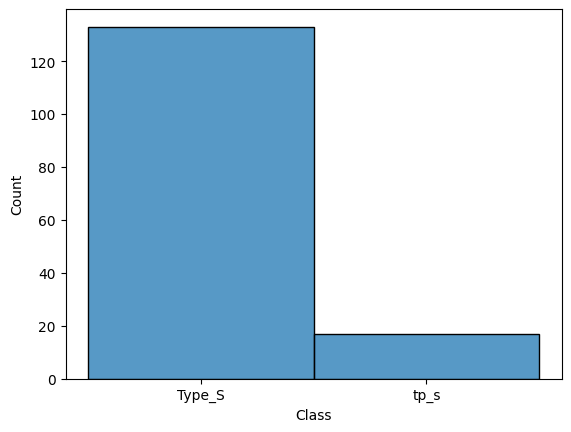

In [306]:
# Create a hist plot for Type_S Dataset
sns.histplot(type_s_df['Class'], bins=10, kde=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

* There are 2 types of Class in Type_S dataset
    * Type_S
    * tp_s

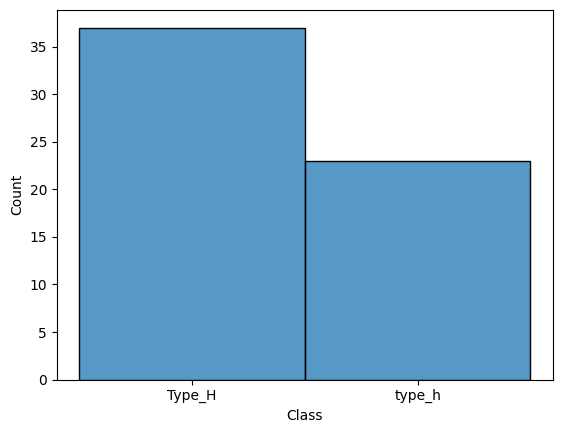

In [307]:
# Create a hist plot for Type_H Dataset
sns.histplot(type_h_df['Class'], bins=10, kde=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

* There are 2 types of Class in Type_H dataset
    * Type_H
    * type_h

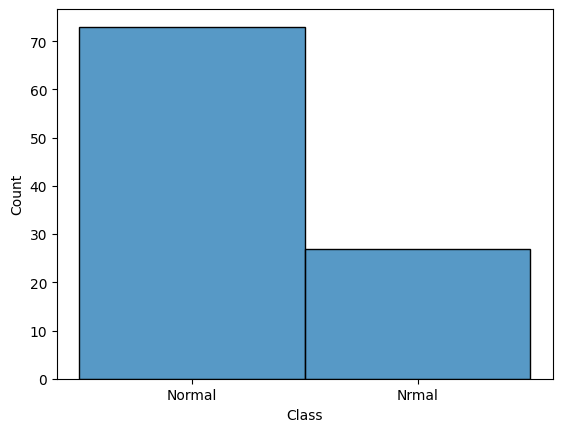

In [308]:
# Create a hist plot for Normal Dataset
sns.histplot(normal_df['Class'], bins=10, kde=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

* There are 2 types of Class in Normal dataset
    * Normal
    * Nrmal

### 2. Data Preparation and Exploration

#### 2A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames
For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

In [309]:
# Convert all entries in 'Class' column to lowercase for Type_S dataframe
type_s_df['Class'] = type_s_df['Class'].str.lower()
# Replace 'tp_s' with 'type_s' in the 'Class' column
type_s_df['Class'] = type_s_df['Class'].replace('tp_s', 'type_s')
type_s_df['Class'].unique()

array(['type_s'], dtype=object)

In [310]:
# Convert all entries in 'Class' column to lowercase for Type_H dataframe
type_h_df['Class'] = type_h_df['Class'].str.lower()
type_h_df['Class'].unique()

array(['type_h'], dtype=object)

In [311]:
# Convert all entries in 'Class' column to lowercase for Normal dataframe
normal_df['Class'] = normal_df['Class'].str.lower()
# Replace 'nrmal' with 'normal' in the 'Class' column
normal_df['Class'] = normal_df['Class'].replace('nrmal', 'normal')
normal_df['Class'].unique()


array(['normal'], dtype=object)

#### 2B. Combine all the 3 DataFrames to form a single DataFrame
Checkpoint: Expected Output shape = (310,7)

In [312]:
# Append the three DataFrames
df = pd.concat([type_s_df, type_h_df, normal_df], ignore_index=True)
print("Shape of the combined dataframe :{} ".format(df.shape))

Shape of the combined dataframe :(310, 7) 


In [313]:
#Observe the unique values in Class column
df.Class.unique()

array(['type_s', 'type_h', 'normal'], dtype=object)

In [314]:
df.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
normal,100,100,100,100,100,100
type_h,60,60,60,60,60,60
type_s,150,150,150,150,150,150


#### 2C. Print 5 random samples of this DataFrame

In [315]:
#Random sample from combined dataframe
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
20,77.106571,30.469994,69.480628,46.636577,112.151600,70.759083,type_s
96,79.476978,26.732268,70.650982,52.744711,118.588669,61.700598,type_s
29,71.186811,23.896201,43.696665,47.290610,119.864938,27.283985,type_s
41,79.938570,18.774071,63.311835,61.164499,114.787107,38.538741,type_s
57,86.041280,38.750670,47.871405,47.290610,122.092954,61.988277,type_s


#### 2D. Print Feature-wise percentage of Null values. 

In [316]:
# Check the sum of all null values
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

* There are null values in any column

In [317]:
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

#### 2E. Check 5-point summary of the new DataFrame

* A 5-point summary for a dataframe consists of the following statistics for each numerical column:
    * Minimum: The smallest value in the dataset.
    * Q1 (First Quartile): The value below which 25% of the data falls.
    * Median (Q2 or Second Quartile): The middle value of the dataset, where 50% of the data falls below and 50% above this value.
    * Q3 (Third Quartile): The value below which 75% of the data falls.
    * Maximum: The largest value in the dataset.

In [318]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### 3. Data Analysis

#### 3A. Visualize a heatmap to understand correlation between all features

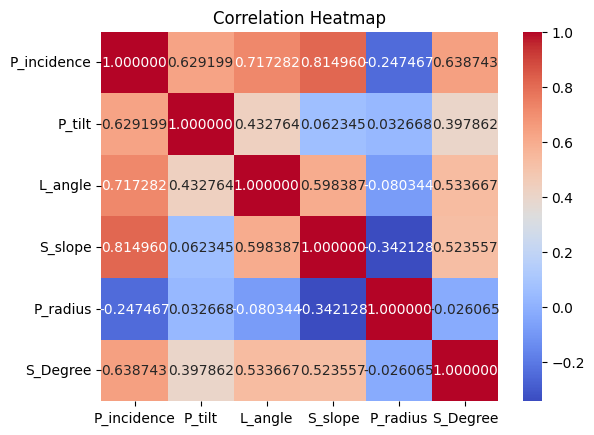

In [319]:
numerical_columns = df.select_dtypes(include=['number'])
sns.heatmap(numerical_columns.corr(),cmap='coolwarm', annot=True, fmt="f")
plt.title('Correlation Heatmap')
plt.show()

* P_incidence and S_slope are highly correlated 
* There is good correlation between P_incidence and L_angle also

#### 3B. Share insights on correlation

##### A. Features having stronger correlation with correlation value.
P_incidence has a positive correlation with all features except P_radius

##### B. Features having weaker correlation with correlation value.
P_radius is having weaker correlation with most of the other features

#### 3C. Visualize a pairplot with 3 classes distinguished by colors and share insights

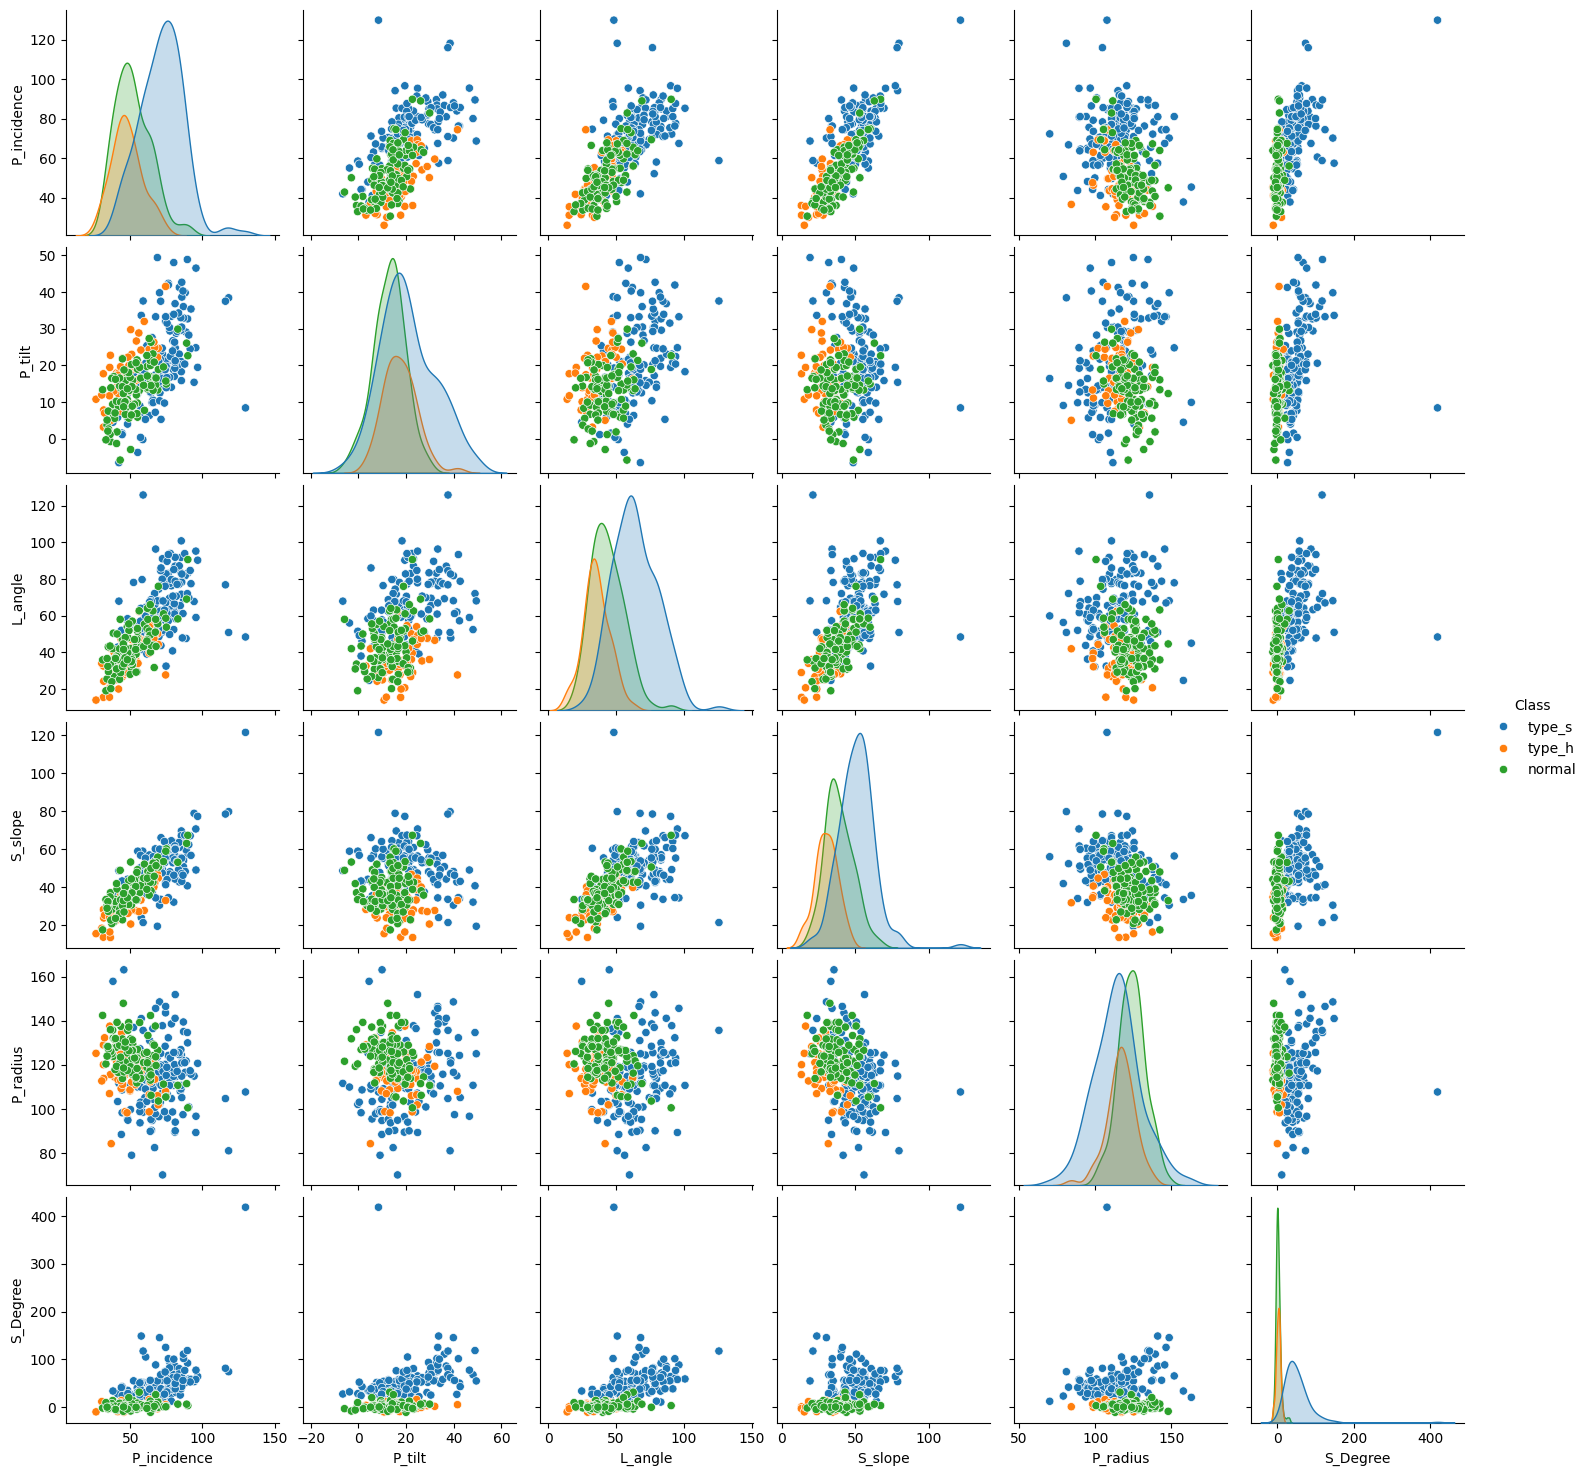

In [320]:
# Create a pair plot for df Dataset
sns.pairplot(df, hue='Class')

* type_s Class frequency is higher than the other 2 Class
* type_h Class frequency is lower than the other 2 Class

#### 3D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

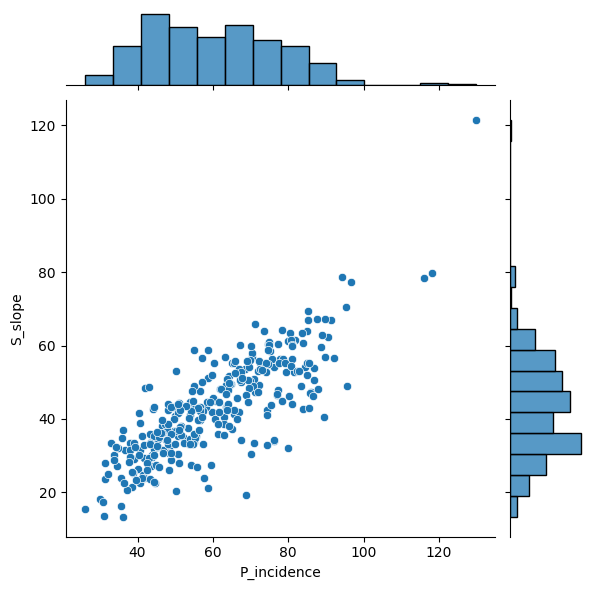

In [321]:
# Create a joint plot for df Dataset
sns.jointplot(data=df, x='P_incidence', y='S_slope')

* P_incidence and S_slope are positively correlated

#### 3E. Visualize a boxplot to check distribution of the features and share insights. 

<Axes: ylabel='P_incidence'>

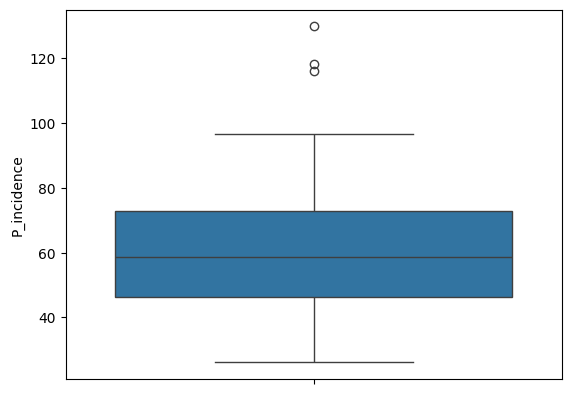

In [322]:
sns.boxplot(data=df, y='P_incidence')

* P_incidence data is right skewed and has 3 outliers

<Axes: ylabel='P_tilt'>

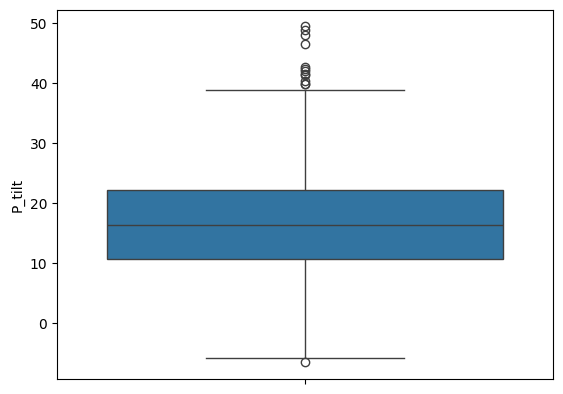

In [323]:
sns.boxplot(data=df, y='P_tilt')

* P_tilt data distributed normal and has high number of outliers

<Axes: ylabel='L_angle'>

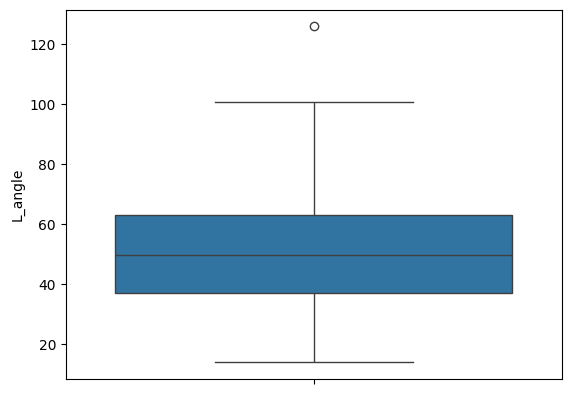

In [324]:
sns.boxplot(data=df, y='L_angle')

* L_angle distributed normal and has 1 outlier

<Axes: ylabel='S_slope'>

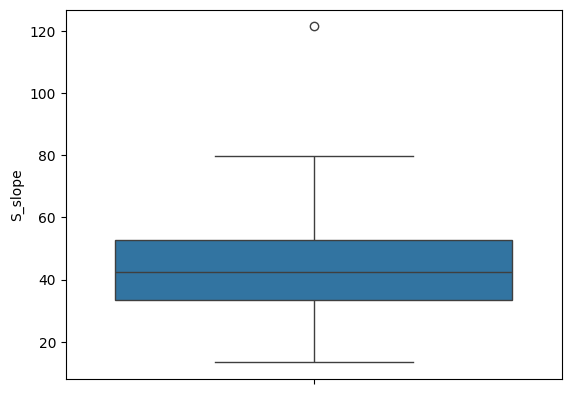

In [325]:
sns.boxplot(data=df, y='S_slope')

* S_slope distributed normal and has 1 outlier

<Axes: ylabel='P_radius'>

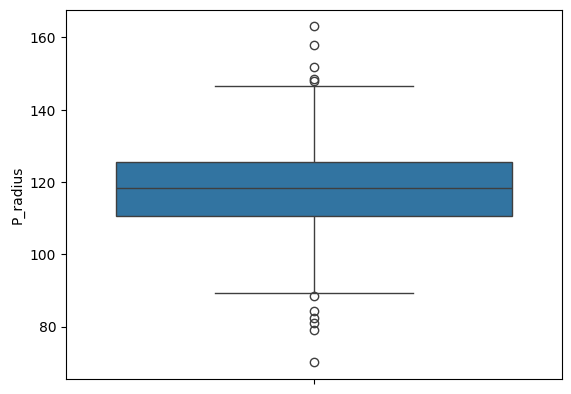

In [326]:
sns.boxplot(data=df, y='P_radius')

* P_radius distributed normal and has higher outliers

<Axes: ylabel='S_Degree'>

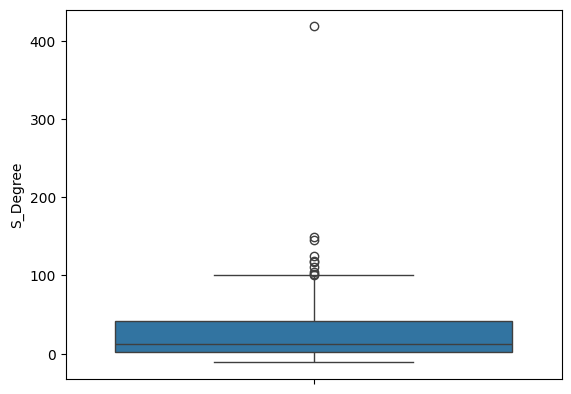

In [327]:
sns.boxplot(data=df, y='S_Degree')

* S_Degree is highly right skewed and has many outliers

### 4. Model Building

#### 4A. Split data into X and Y 

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [329]:
df.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
normal,100,100,100,100,100,100
type_h,60,60,60,60,60,60
type_s,150,150,150,150,150,150


In [330]:
df.Class.value_counts()

Class
type_s    150
normal    100
type_h     60
Name: count, dtype: int64

In [331]:
# To convert categorical label Class into numerical values - Label Encode the Target Variable
labelEncoder = LabelEncoder()

df['Class']= labelEncoder.fit_transform(df['Class'])
df.Class.value_counts()

Class
2    150
0    100
1     60
Name: count, dtype: int64

* type_s =2, type_h = 1, normal=0

In [332]:
#See Class data to understand if label encoding is done or not
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
296,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980,0
117,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,2
10,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,2
164,57.300227,24.188885,47.000000,33.111342,116.806587,5.766947,1
72,69.626283,21.122751,52.766595,48.503532,116.803091,54.816867,2


In [333]:
# Define X by dropping labeled data column
X = df.drop(['Class'], axis =1)
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972


In [334]:
#Define Y - which column that needs to be predicted
y = df['Class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

#### 4B. Split data into train and test with 80:20 proportion.

In [335]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)

print("Training size: {}, Testing size: {} out of {}".format(len(X_train), len(X_test), len(df)))


Training size: 248, Testing size: 62 out of 310


#### 4C. Train a Supervised Learning Classification base model using KNN classifier. 

In [336]:
from sklearn.neighbors import KNeighborsClassifier

In [337]:
# Supervised Learning Classification base model using KNN Classifier
# Train the model
knn = KNeighborsClassifier(n_neighbors=10,metric = 'minkowski') 
knn.fit(X_train, y_train)

# Predict values from the trained model
y_test_pred = knn.predict(X_test)
y_test_pred

array([2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2])

#### 4D. Print all the possible performance metrics for both train and test data

In [338]:
from sklearn.metrics import accuracy_score, consensus_score, confusion_matrix
from sklearn.metrics import classification_report

# Calculate Training Accuracy
y_train_pred = knn.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print('Training dataset - Accuracy: {}'.format(training_accuracy))

# Calculate Testing Accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print('Testing dataset - Accuracy: {}'.format(testing_accuracy))

Training dataset - Accuracy: 0.8548387096774194
Testing dataset - Accuracy: 0.8548387096774194


In [339]:
#Calculate Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
confusion_matrix

array([[17,  1,  0],
       [ 7,  8,  0],
       [ 1,  0, 28]])

In [340]:
conf_matrix_df = pd.DataFrame(confusion_matrix, index=[i for i in [ 'Actual normal', 'Actual type_h', 'Actual type_s']], 
                              columns=[j for j in ['Predicted normal', 'predicted type_h', 'predicted type_s']])
conf_matrix_df

,Predicted normal,predicted type_h,predicted type_s
Actual normal,17,1,0
Actual type_h,7,8,0
Actual type_s,1,0,28


* Model predicted
    * 14 normal which is correct, whereas other 7 are predicted as type_h and type_s
    * 9 type_h which is correct, whereas 5 are predicted as normal and type_s
    * 25 type_s which is correct, whereas 2 are predicted as normal and type_h
  

<Axes: >

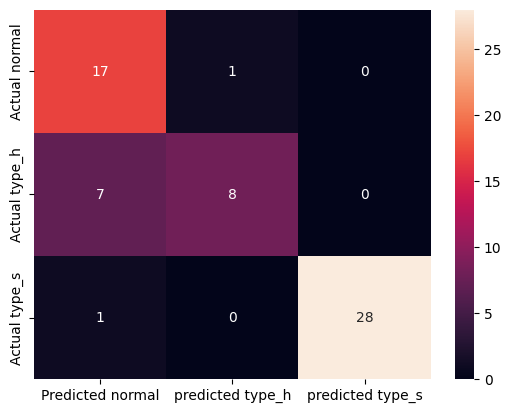

In [341]:
sns.heatmap(conf_matrix_df,annot=True)

In [342]:
#classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.89      0.53      0.67        15
           2       1.00      0.97      0.98        29

    accuracy                           0.85        62
   macro avg       0.86      0.81      0.81        62
weighted avg       0.88      0.85      0.85        62



### 5. Performance Improvements

#### 5A. Experiment with various parameters to improve performance of the base model.

In [343]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = df.drop(['Class'], axis =1)
y = df['Class']

# Preprocess the data: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Increased range for n_neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': list(range(10, 51, 10))  # Increased range for leaf_size
}

# Implement GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # Increased cv to 10 for more robust results
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Test Accuracy: 0.8387096774193549
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.73      0.79      0.76        14
           2       0.96      0.87      0.91        30

    accuracy                           0.84        62
   macro avg       0.82      0.83      0.82        62
weighted avg       0.85      0.84      0.84        62



#### 5B. Clearly showcase improvement in performance achieved.

* with the change in n_neighbours accuracy improved

In [344]:
# For various values of K Nearest Neighbours

for i in [3,4,5,7,9,10,12,14,16]:
    knn = KNeighborsClassifier(n_neighbors=i, leaf_size = 10, metric = 'euclidean' ,weights = 'distance' )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Train Accuracy for n_neighbours = {} is {}'.format(i, knn.score(X_train, y_train)))
    print('Test Accuracy for n_neighbours = {} is {}'.format(i, knn.score(X_test, y_test)))
    print("Classification Report: \n", classification_report(y_test, y_pred))

Train Accuracy for n_neighbours = 3 is 1.0
Test Accuracy for n_neighbours = 3 is 0.7580645161290323
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.61      0.79      0.69        14
           2       0.93      0.83      0.88        30

    accuracy                           0.76        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.77      0.76      0.76        62

Train Accuracy for n_neighbours = 4 is 1.0
Test Accuracy for n_neighbours = 4 is 0.7903225806451613
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.61      0.79      0.69        14
           2       0.96      0.87      0.91        30

    accuracy                           0.79        62
   macro avg       0.76      0.77      0.76        62
weighted avg       0.81      0.79      0.80

* From the above details, Accuracy and Precision are improving around n_neighbours = 7 and clearly the accuracy improved by 6%

#### 5C.Clearly state which parameters contributed most to improve model performance.

* Best Parameters that contributed to improve model performance
    * 'leaf_size': 10
    * 'metric': 'euclidean'
    * 'n_neighbors': 7
    * 'weights': 'distance'
* Model performed best for Neighbour count of 7

## PART B

* DOMAIN: Banking, Marketing
* CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.
* DATA DICTIONARY:
    1. ID: Customer ID
    2. Age: Customer’s approximate age.
    3. CustomerSince: Customer of the bank since. [unit is masked]
    4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
    5. ZipCode: Customer’s zip code.
    6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
    7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
    8. Level: A level associated to the customer which is masked by the bank as an IP.
    9. Mortgage: Customer’s mortgage. [unit is masked]
   10. Security: Customer’s security asset with the bank. [unit is masked]
   11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
   12. InternetBanking: if the customer uses internet banking.
   13. CreditCard: if the customer uses bank’s credit card.
   14. LoanOnCard: if the customer has a loan on credit card.
* PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

### 1. Data Understanding and Preparation

#### 1A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [345]:
df1 =  pd.read_csv('Data1.csv')
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [346]:
df2 = pd.read_csv('Data2.csv')
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


#### 1B. Print shape and Column Names and DataTypes of both the Dataframes

In [347]:
df1.shape

(5000, 8)

* There are 5000 rows and 8 columns


In [348]:
df2.shape

(5000, 7)

* There are 5000 rows and 7 columns


In [349]:
df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

* 8 Columns are present: 
    * ID
    * Age
    * CustomerSince
    * HighestSpend
    * ZipCode
    * HiddenScore
    * MonthlyAverageSpend
    * Level

In [350]:
df2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

* 7 Columns are present: 
    * ID
    * Mortgage
    * Security
    * FixedDepositAccount
    * InternetBanking
    * CreditCard
    * LoanOnCard

In [351]:
#Get the information for df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


* All columns in data1 dataset are numerical columns

In [352]:
#Get the information for df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


* All columns in data2 dataset are numerical columns

#### 1C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [353]:
# Merge dataframes on the 'ID' column
df = pd.merge(df1, df2, how='outer', on='ID')
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [354]:
df.shape

(5000, 14)

* After merging on ID column, we can observe 5000 rows with 14 columns 

#### 1D. Change Datatype of below features to ‘Object’
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [355]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [356]:
obj_list = ['CreditCard','InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in obj_list:
    df[i] = df[i].astype(object)
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

* Given columns are changed into object 

### 2.Data Exploration and Analysis

#### 2A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

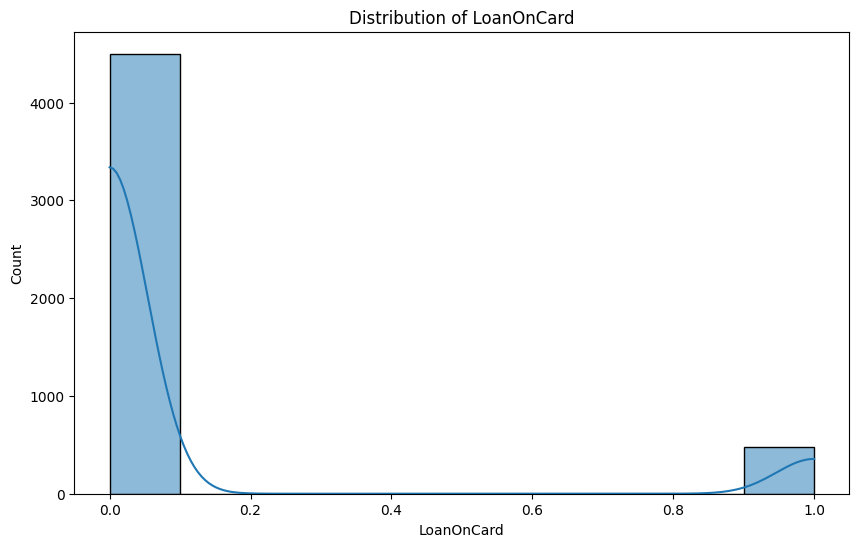

In [357]:
# Plot the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanOnCard'], kde=True, bins=10)
plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

* Seems like there are very less number of customers who are given 'LoanOnCard' option

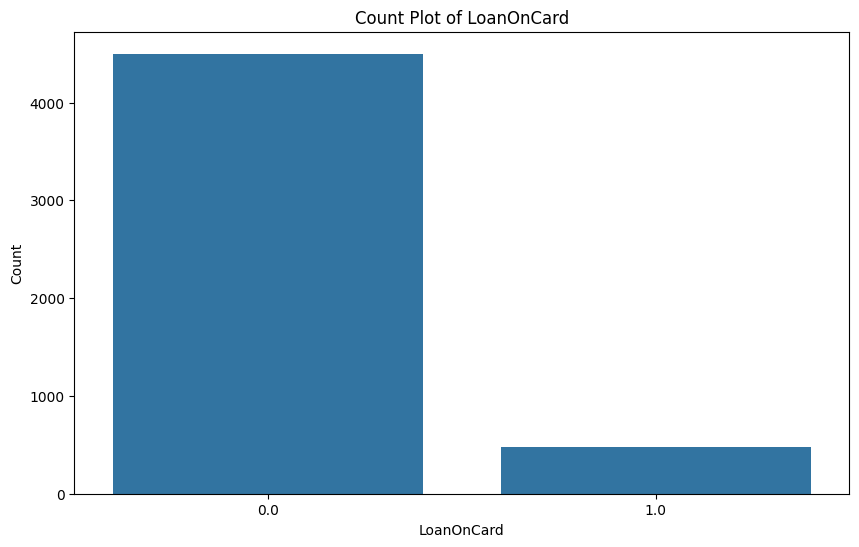

In [358]:
# Plot the distribution using a bar plot (for categorical target variable)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['LoanOnCard'])
plt.title('Count Plot of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

* The above plot clearly shows that data distribution is not balanced.
* Count is very high for 0 and less for 1

#### 2B. Check the percentage of missing values and impute if required

In [359]:
#Checking for null and NA values
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

* There are 20  null values in LoanOnCard

In [360]:
# Lets drop the na values
df.dropna(axis=0, inplace=True)

In [361]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

* After dropping the Values NA, there are no null/NA values remaining.

#### 2C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [362]:
#obj_list is from earlier cell where it was defined about all categorical variables
for i in obj_list:
    print("{} : {}" .format(i,df[i].unique()))

CreditCard : [0 1]
InternetBanking : [0 1]
FixedDepositAccount : [0 1]
Security : [0 1]
Level : [3 2 1]
HiddenScore : [1 4 3 2]


* There are no unexpected variables in the given categorical variables list

In [363]:
#Lets see all the other variables
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759,0.096386
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758,0.295149
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000,1.000000


* Seems like there is a minimum number of -3.000 in CustomerSince variable, replace that with zero

In [364]:
# Replace negative values with zero
df['CustomerSince'] = df['CustomerSince'].apply(lambda x: 0 if x < 0 else x)

In [365]:
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.132530,73.85241,93152.420482,1.939536,56.589759,0.096386
std,1438.011129,11.464212,11.441482,46.07009,2123.660073,1.750006,101.836758,0.295149
min,10.000000,23.000000,0.000000,8.00000,9307.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000,1.000000


* All values are validated and seems no correction required

### 3. Data Preparation and model building

#### 3A. Split data into X and Y. 
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [366]:
X = df.drop(labels=['ID', 'ZipCode', 'LoanOnCard'], axis=1)
X.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,1,8.9,3,0,0,0,0,0
10,65,39,105,4,2.4,3,0,0,0,0,0
11,29,5,45,3,0.1,2,0,0,0,1,0
12,48,23,114,2,3.8,3,0,1,0,0,0
13,59,32,40,4,2.5,2,0,0,0,1,0


In [367]:
y = df['LoanOnCard']
y.head()

9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: LoanOnCard, dtype: float64

In [368]:
X.count()

Age                    4980
CustomerSince          4980
HighestSpend           4980
HiddenScore            4980
MonthlyAverageSpend    4980
Level                  4980
Mortgage               4980
Security               4980
FixedDepositAccount    4980
InternetBanking        4980
CreditCard             4980
dtype: int64

#### 3B. Split data into train and test. Keep 25% data reserved for testing.

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print("Training size {} out of {} ".format(len(X_train) , len(df)))
print("Testing size {} out of {} ".format(len(X_test) , len(df)))

Training size 3735 out of 4980 
Testing size 1245 out of 4980 


#### 3C. Train a Supervised Learning Classification base model - Logistic Regression. 

In [370]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(max_iter=1000) ## with default max_iter, convergence warning is coming
logisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [371]:
y_pred = logisticRegression.predict(X_test)
print('Training data - Accuracy :',logisticRegression.score(X_train, y_train) )
print('Testing data - Accuracy :',logisticRegression.score(X_test, y_test) )

Training data - Accuracy : 0.9491298527443106
Testing data - Accuracy : 0.957429718875502


#### 3D. Print evaluation metrics for the model and clearly share insights

In [372]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred, labels = [0,1])
cmatrix

array([[1106,   12],
       [  41,   86]])

In [373]:
conf_matrix_df = pd.DataFrame(cmatrix, index=['Actual No Loan Customers', 'Actual Loan Customers'], 
                              columns=['Predicted No Loan Customers', 'Predicted Loan Customers'])
conf_matrix_df

,Predicted No Loan Customers,Predicted Loan Customers
Actual No Loan Customers,1106,12
Actual Loan Customers,41,86


* Model Predicted
    * 1106 Customers doesnot get loan which is correct, 41 wrongly predicted
    * 86 Customer which gets loan which is correct, 12 wrongly predicted

<Axes: >

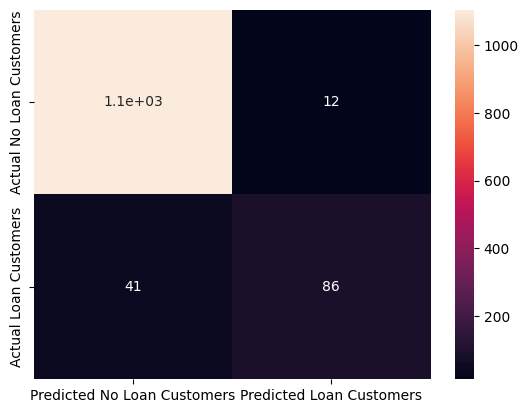

In [374]:
sns.heatmap(conf_matrix_df,annot=True)

In [375]:
#Classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1118
         1.0       0.88      0.68      0.76       127

    accuracy                           0.96      1245
   macro avg       0.92      0.83      0.87      1245
weighted avg       0.96      0.96      0.95      1245



In [376]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.8332159508683956

* Model is predicting label 0 more accurately with precision 96%
* The recall for label 1 is very less at 68% and AUC score is at 83%
* Conclusion: As we have identified initially that the class distribution is not uniform, it is highly likely that model is biased towards label of 0

#### 3E. Balance the data using the right balancing technique. [2 Marks]
* i. Check distribution of the target variable
* ii. Say output is class A : 20% and class B : 80%
* iii. Here you need to balance the target variable as 50:50.
* iv. Try appropriate method to achieve the same.


In [377]:
# Trying to balance the data using SMOTE Library
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [378]:
y_train.value_counts()

LoanOnCard
0.0    3382
1.0     353
Name: count, dtype: int64

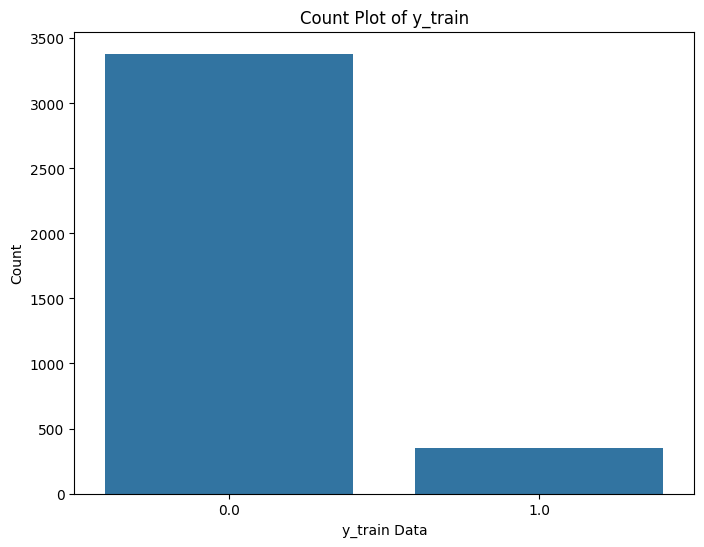

In [379]:
# Plotting the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Count Plot of y_train')
plt.xlabel('y_train Data')
plt.ylabel('Count')
plt.show()

* This implies around >90% is into No Loan Customers labels, so its 90% & 10% distribution

In [380]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
#Trying to resampling training data
smote = SMOTE()
X_sample, y_sample = smote.fit_resample(X_train, y_train)
y_sample.value_counts()

LoanOnCard
0.0    3382
1.0    3382
Name: count, dtype: int64

* Now the distribution is sampled at 50:50

#### 3F. Again train the same previous model on balanced data. 

In [381]:
logisticRegression_sampled = LogisticRegression( max_iter=2000)
# Fit the Model on Sample Training Data
logisticRegression_sampled.fit(X_sample, y_sample)

LogisticRegression(max_iter=2000)

In [382]:
y_pred_sample = logisticRegression_sampled.predict(X_test)
y_pred_sample

array([1., 0., 1., ..., 0., 0., 1.])

#### 3G. Print evaluation metrics and clearly share differences observed.

In [383]:
#Lets check the accuracy
print('Training data - Accuracy :',logisticRegression_sampled.score(X_sample, y_sample))
print('Testing data - Accuracy :',logisticRegression_sampled.score(X_test, y_test))

Training data - Accuracy : 0.9083382613837966
Testing data - Accuracy : 0.8867469879518072


In [384]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred_sample, labels=[0,1])
cmatrix

array([[991, 127],
       [ 14, 113]])

In [385]:
conf_matrix_df = pd.DataFrame(cmatrix, index=['Actual No Loan Customers', 'Actual Loan Customers'], 
                              columns=['Predicted No Loan Customers', 'Predicted Loan Customers'])
conf_matrix_df

,Predicted No Loan Customers,Predicted Loan Customers
Actual No Loan Customers,991,127
Actual Loan Customers,14,113


* Model Predicted
   * 995 Customers doesnot get loan which is correct, 14 wrongly predicted
   * 113 Customers which gets loan which is correct, 123 wrongly predicted

<Axes: >

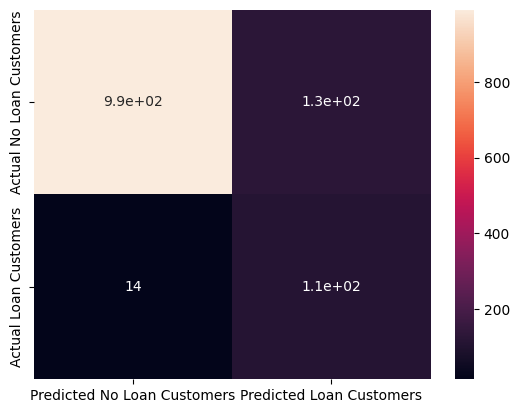

In [386]:
sns.heatmap(conf_matrix_df,annot=True)

In [387]:
#Classification report
print("Classification Report")
print(classification_report(y_test, y_pred_sample))

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1118
         1.0       0.47      0.89      0.62       127

    accuracy                           0.89      1245
   macro avg       0.73      0.89      0.77      1245
weighted avg       0.93      0.89      0.90      1245



In [388]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred_sample)

0.8880840364542982

* Recall has been increased significantly by 25%
* Accuracy has been decreased slightly and AUC score increased to 89%
* All the metrics are considerably improved and meaningful after balancing the distribution

## 4. Performance Improvement

#### 4A. Train a base model each for SVM, KNN

In [389]:
# Model Building using KNN
kNeighborsClassifier = KNeighborsClassifier(n_neighbors= 5 ,metric = 'minkowski' )
kNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [390]:
#predict the target
y_pred_knn = kNeighborsClassifier.predict(X_test)
y_pred_knn

array([0., 1., 0., ..., 0., 0., 0.])

In [391]:
#Accuracy scores
print('KNN Model- Accuracy on Training data :',kNeighborsClassifier.score(X_train, y_train))
print('KNN Model Accuracy on Test data :',kNeighborsClassifier.score(X_test, y_test))

KNN Model- Accuracy on Training data : 0.9362784471218206
KNN Model Accuracy on Test data : 0.908433734939759


In [392]:
print("KNN Model- Classification Report \n", classification_report(y_test, y_pred_knn))

KNN Model- Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1118
         1.0       0.57      0.40      0.47       127

    accuracy                           0.91      1245
   macro avg       0.75      0.68      0.71      1245
weighted avg       0.90      0.91      0.90      1245



In [393]:
print("Logistic Regression Model - Classification Report \n", classification_report(y_test, y_pred_sample))

Logistic Regression Model - Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1118
         1.0       0.47      0.89      0.62       127

    accuracy                           0.89      1245
   macro avg       0.73      0.89      0.77      1245
weighted avg       0.93      0.89      0.90      1245



* Accuracy from KNN is almost similar to Logistic Regresion Model
* f1-score and recall are better in Logistic Regression Model

In [394]:
# Model Building using SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [395]:
y_pred_svc = svc.predict(X_test)
y_pred_svc


array([0., 0., 0., ..., 0., 0., 0.])

In [396]:
#Accuracy details
print('SVC Model- Accuracy on Training data: ',svc.score(X_train, y_train) )
print('SVC Model Accuracy on Test data: ',svc.score(X_test, y_test) )

SVC Model- Accuracy on Training data:  0.9113788487282464
SVC Model Accuracy on Test data:  0.9036144578313253


In [397]:
print("SVC Model- Classification Report \n", classification_report(y_test, y_pred_svc))

SVC Model- Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1118
         1.0       0.65      0.12      0.20       127

    accuracy                           0.90      1245
   macro avg       0.78      0.56      0.57      1245
weighted avg       0.88      0.90      0.87      1245



In [398]:
print("SVC Model - AUC score: " ,metrics.roc_auc_score(y_test, y_pred_svc))

SVC Model - AUC score:  0.5554773005789303


* Eventhough accuracy is nearby the other 2 models, precision and f1-score for Class 1 is very less.SVC model doesnot perform well compared to KNN and Logistic Regression Models

#### 4B. Tune Hyperparamaters for above models

In [399]:
# For KNN - Try with different variables and values of C and Gamma and find out the best values
best_k = 0
best_score = 0
k_vals = [4,5,7,9,10,12,14,16]
for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_sample, y_sample)
    y_pred = knn.predict(X_test)
    score = knn.score(X_train, y_train)
    if score > best_score:
        best_score = score
        best_k = i

print('Highest Accuracy Score: {}, Best K Value: {} '.format(best_score, best_k))

Highest Accuracy Score: 0.9488621151271753, Best K Value: 4 


In [400]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_sample, y_sample)
y_pred_best_knn = knn.predict(X_test)
print("Best KNN Model - Classification Report \n", classification_report(y_test, y_pred_best_knn))

Best KNN Model - Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1118
         1.0       0.44      0.76      0.56       127

    accuracy                           0.88      1245
   macro avg       0.71      0.82      0.74      1245
weighted avg       0.92      0.88      0.89      1245



In [401]:
print("Best KNN Model - AUC Score:", metrics.roc_auc_score(y_test, y_pred_best_knn))

Best KNN Model - AUC Score: 0.82383826574451


* From the above results, we can say that the KNN model with k value =4 gives the highest accuracy, precision, recall and f1 score.

In [402]:
# For SVC - Try with different variables and values of C and Gamma and find out the best values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
best_score = 0
best_gamma = 0
best_C = 0
c_vals = [0.01,0.1,1,1000]
gamma_vals = [0.001,0.01,0.1,1,1000]
for C in c_vals:
    for gamma in gamma_vals:
        model = SVC(kernel='rbf', gamma=gamma, C=C)
        model.fit(X_sample, y_sample)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_gamma = gamma
            best_C = C
print('Highest Accuracy Score: {}, Best C Value: {}, Best Gamma Value: {} '.format(best_score, best_C, best_gamma))  

Highest Accuracy Score: 0.9477911646586346, Best C Value: 1000, Best Gamma Value: 0.001 


In [403]:
svc_best = SVC(kernel='rbf', gamma=best_gamma, C=best_C)
svc_best.fit(X_sample, y_sample)
y_pred_best_svc = svc_best.predict(X_test)
y_pred_best_svc

array([1., 0., 0., ..., 0., 0., 0.])

In [404]:
print("Tuned SVC Model - Classification Report \n", classification_report(y_test, y_pred_best_svc, zero_division=0))

Tuned SVC Model - Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1118
         1.0       0.73      0.78      0.75       127

    accuracy                           0.95      1245
   macro avg       0.85      0.87      0.86      1245
weighted avg       0.95      0.95      0.95      1245



In [405]:
print("Best SVC Model - AUC Score:", metrics.roc_auc_score(y_test, y_pred_best_svc))

Best SVC Model - AUC Score: 0.8732163734452693


* From the above results, we can say that the SVM model with C=1000 and gamma=0.001 gives the highest accuracy, precision, recall and f1 score.

#### 4C.Print evaluation metrics for final model.

In [406]:
svc_best = SVC(kernel='rbf', gamma=best_gamma, C=best_C)
svc_best.fit(X_sample, y_sample)
y_pred_best_svc = svc_best.predict(X_test)
print('Confusion Matrix of the final model: \n', metrics.confusion_matrix(y_test, y_pred_best_svc))
print('Classification Report of the final model: \n', metrics.classification_report(y_test, y_pred_best_svc))
print('ROC_AUC Score of the final model:', metrics.roc_auc_score(y_test, y_pred_best_svc).round(3))
print('Accuracy Score of the final model: ',  svc_best.score(X_test, y_test))

Confusion Matrix of the final model: 
 [[1081   37]
 [  28   99]]
Classification Report of the final model: 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1118
         1.0       0.73      0.78      0.75       127

    accuracy                           0.95      1245
   macro avg       0.85      0.87      0.86      1245
weighted avg       0.95      0.95      0.95      1245

ROC_AUC Score of the final model: 0.873
Accuracy Score of the final model:  0.9477911646586346


#### 4D. Share improvement achieved from base model to final model.

* We are chosing SVC Model because
    * Base model is biased towards label '0' class while the final model is not.
    * Accuracy increased from 0.90 to 0.94.
    * Precision, Recall and f1-score has increased in the final model.
    * Intial ROC_AUC score was 0.5 and after tuning parameters it is 0.873